# 🩺 Predicting Diabetes with Machine Learning

## 📌 Project Overview
Diabetes is one of the most common chronic diseases worldwide. Early prediction of diabetes can help reduce risks, improve treatment, and enhance the quality of life for patients.  
In this project, we build **Machine Learning models** using the famous **Pima Indians Diabetes Dataset** to classify whether a patient is likely to develop diabetes based on key medical indicators.

---

## 🎯 Objectives
1. **Data Preprocessing**  
   - Handle missing/invalid values  
   - Normalize and scale numerical features  
   - Encode categorical variables (if any)

2. **Exploratory Data Analysis (EDA)**  
   - Statistical summary of patient features  
   - Correlation analysis between variables  
   - Visualizations (histograms, boxplots, heatmaps)

3. **Model Building**  
   - Train multiple classification models:  
     - Logistic Regression  
     - Decision Tree  
     - Random Forest  
     - Support Vector Machine (SVM)  
     - XGBoost  
   - Compare model performance using Accuracy, Precision, Recall, F1-score, and ROC-AUC.

4. **Model Optimization**  
   - Hyperparameter tuning (GridSearchCV / RandomizedSearchCV)  
   - Cross-validation for robust evaluation  

5. **Final Deliverable**  
   - Well-documented Jupyter Notebook  
   - Visual reports and insights for decision-making  
   - Reproducible pipeline for future data

---

## 📂 Dataset
- **Name:** Pima Indians Diabetes Database  
- **Source:** Kaggle  
- **Size:** 768 records, 8 features + target  
- **Target Variable:** `Outcome` (0 = No Diabetes, 1 = Diabetes)

---

## 🚀 Why This Project?
- Classic dataset, widely recognized in the ML community  
- Perfect to showcase both **Regression & Classification skills**  
- Demonstrates end-to-end workflow from raw data → insights → predictive model  
- Useful for healthcare-related applications, case studies, and client demos  

---

## 📊 Example Outputs
- Clean, professional visualizations  
- Performance comparison chart across different models  
- Final report highlighting the **best model** for diabetes prediction


## 📚 Importing Libraries

In this section, we import all the essential Python libraries required for data analysis, visualization, and machine learning model building.

- **pandas, numpy** → Data manipulation & numerical operations  
- **matplotlib, seaborn** → Data visualization  
- **scikit-learn** → Preprocessing, model training & evaluation  
- **xgboost** → Advanced gradient boosting model


In [22]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, classification_report
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

## 📂 Load Dataset

We will now load the **Pima Indians Diabetes Dataset** into a pandas DataFrame.  
To quickly inspect the structure of the data, we use the `.head()` method to display the first 5 rows.


In [4]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 📏 Dataset Shape

To understand the size of our dataset, we check the number of rows (samples) and columns (features).  
This helps us know how many patient records we are working with and how many features describe each patient.


In [5]:
df.shape

(768, 9)

## 🔍 Missing Values Check

Before building any model, it is crucial to check for missing values in the dataset.  
We use `df.isnull().sum()` to see how many null (NaN) values exist in each column.


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## 🧾 Dataset Information

To understand the structure of our dataset, we use `df.info()`.  
This provides details about:
- Number of entries (rows)  
- Column names  
- Data types (integer, float, object)  
- Non-null counts (helps to detect missing data)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## 📊 Summary Statistics

We use `df.describe()` to get a quick statistical summary of the dataset.  
This includes:
- Count of values in each column  
- Mean, standard deviation  
- Minimum, maximum  
- Quartiles (25%, 50%, 75%)  

These metrics help us understand the distribution and scale of each feature.


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 📈 Feature Distributions (Histograms)

To better understand the distribution of each feature, we plot histograms.  
This helps us identify:
- Skewness (whether data is left/right skewed)  
- Range of values for each variable  
- Potential anomalies in the data  

Histograms give a quick overview of how patient features are spread across the dataset.


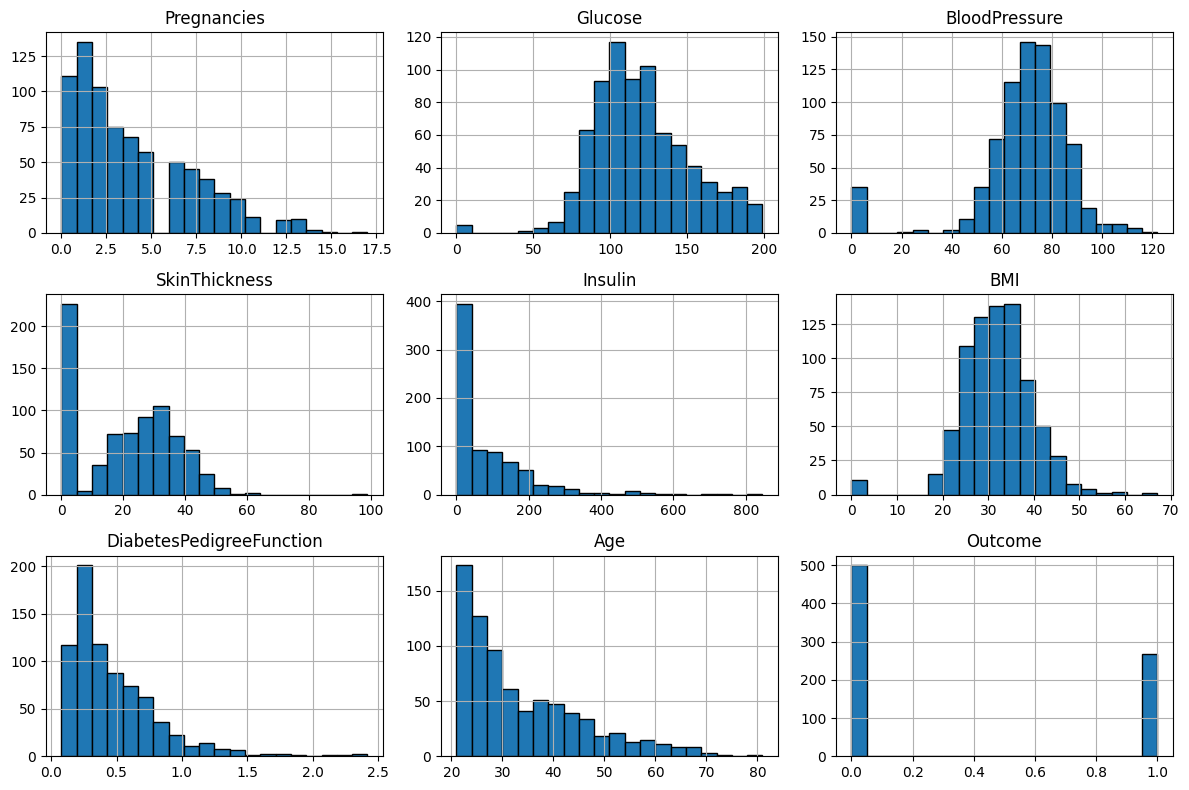

In [9]:
# Plot histograms for all features
df.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()


## 📊 Distribution Analysis of Features

By visualizing histograms of all features, we gain insights into the data distribution and detect potential anomalies or skewness.

### 🔹 Pregnancies
- Most patients have **0–3 pregnancies**.  
- Few cases with more than 10 pregnancies → potential outliers.  

### 🔹 Glucose
- Distribution is close to **normal (bell-shaped)** centered around 100–120.  
- Some extreme values close to 0 → may indicate missing or invalid entries.  

### 🔹 BloodPressure
- Distribution centered around **70–80**, which is expected.  
- However, there are unrealistic values at **0** that need attention.  

### 🔹 SkinThickness
- Many patients have values near **0**, which is not physiologically realistic.  
- This suggests missing data encoded as zeros.  
- Otherwise, distribution is spread around 20–40.  

### 🔹 Insulin
- Highly skewed to the right.  
- Many values at **0** (again likely missing data).  
- Some extreme outliers >600.  

### 🔹 BMI
- Looks fairly normal, centered around **30**.  
- A few patients with **BMI=0** (impossible in reality → needs cleaning).  

### 🔹 DiabetesPedigreeFunction
- Right-skewed distribution.  
- Most patients between **0.1–0.5**, but a few outliers >2.  

### 🔹 Age
- Most patients are between **20–40 years old**.  
- Long tail with some patients above 70 years.  

### 🔹 Outcome (Target)
- Imbalanced dataset:  
  - ~500 patients without diabetes (Outcome=0).  
  - ~260 patients with diabetes (Outcome=1).  
- This imbalance should be considered when building models.


## 📦 Outlier Detection with Boxplots

Boxplots are useful to detect outliers and visualize the spread of each feature.  
Key elements of a boxplot:
- The box represents the **interquartile range (IQR)** (25th–75th percentile).  
- The line inside the box is the **median**.  
- Whiskers show the data spread (usually 1.5 × IQR).  
- Points outside whiskers are considered **potential outliers**.

By plotting boxplots of all features, we can quickly identify unrealistic values such as zeros in medical features (e.g., `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, `BMI`).


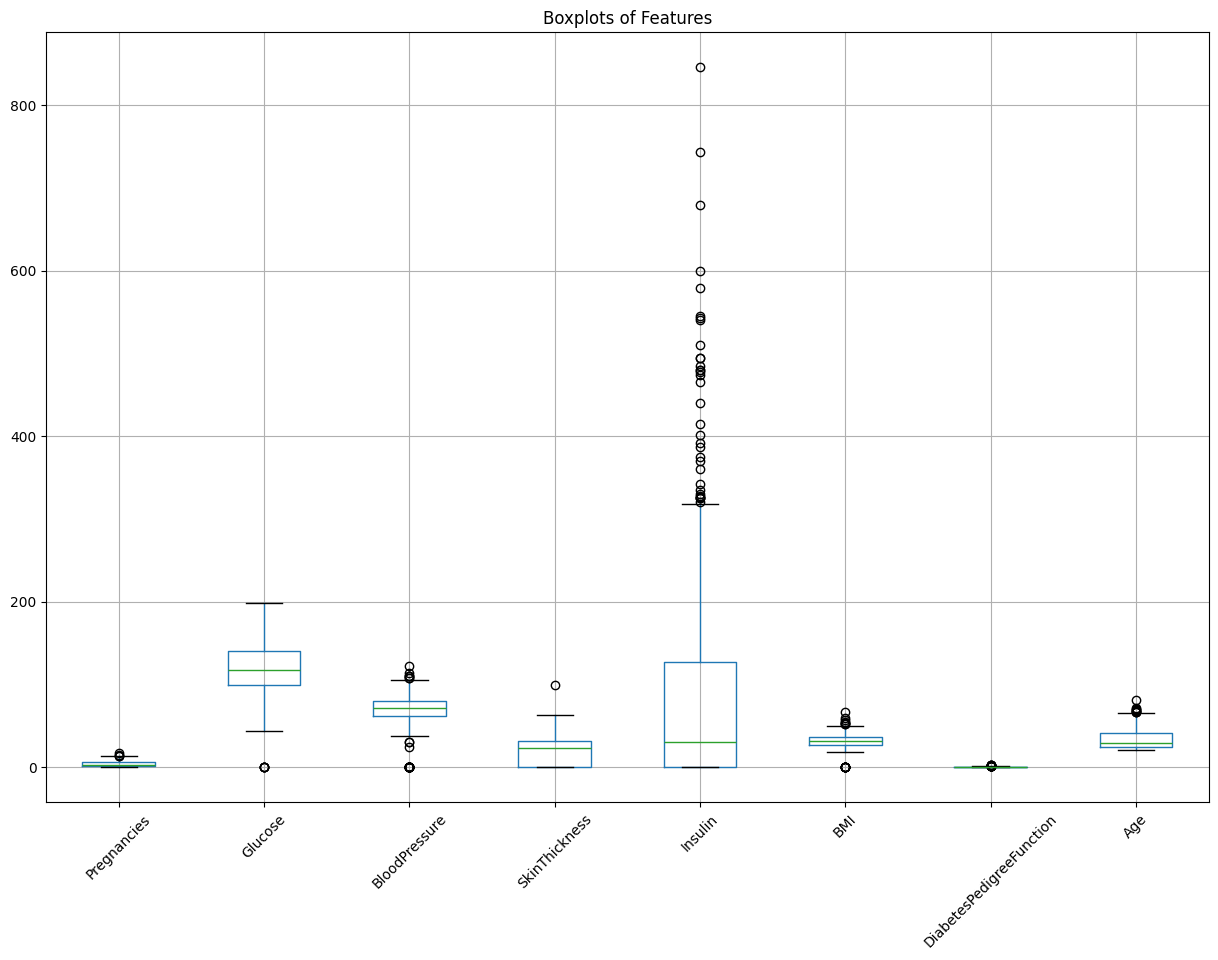

In [10]:
# Boxplots for all features (except Outcome since it's categorical)
plt.figure(figsize=(15,10))
df.drop("Outcome", axis=1).boxplot()
plt.title("Boxplots of Features")
plt.xticks(rotation=45)
plt.show()


## 📦 Outlier Analysis (Boxplots)

From the boxplots of features, we observe the following:

### 🔹 Pregnancies
- Mostly concentrated between **0–5**.  
- A few outliers exist with very high pregnancy counts (>12).  

### 🔹 Glucose
- Majority of values between **80–160**.  
- Some invalid values at **0** (not realistic for glucose level).  

### 🔹 BloodPressure
- Centered around **70–80** as expected.  
- Outliers below 40 and unrealistic zeros detected.  

### 🔹 SkinThickness
- Many zero values (impossible in reality).  
- Typical range: **10–40**.  

### 🔹 Insulin
- Extremely skewed with **a large number of outliers** above 300.  
- Many records at zero → missing data encoded as 0.  

### 🔹 BMI
- Normal distribution around **30**.  
- Unrealistic zeros observed.  

### 🔹 DiabetesPedigreeFunction
- Mostly low values (0–0.5).  
- Some outliers above 2.0.  

### 🔹 Age
- Majority between **20–40 years old**.  
- A few outliers with ages above 70.  

---

📌 **Conclusion:**  
- Several features (`Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, `BMI`) have **invalid zeros** which should be treated as missing values.  
- Features like `Insulin` contain many outliers that may need transformation or robust scaling.  
- Handling these anomalies is crucial before training machine learning models.


## 🔥 Correlation Analysis (Heatmap)

Correlation heatmap helps us understand the linear relationship between features.  
Values range from:
- **+1** → strong positive correlation  
- **-1** → strong negative correlation  
- **0** → no linear relationship  

By visualizing correlations:
- We can detect which features are most related to the target variable (`Outcome`).  
- Also identify multicollinearity (features highly correlated with each other).


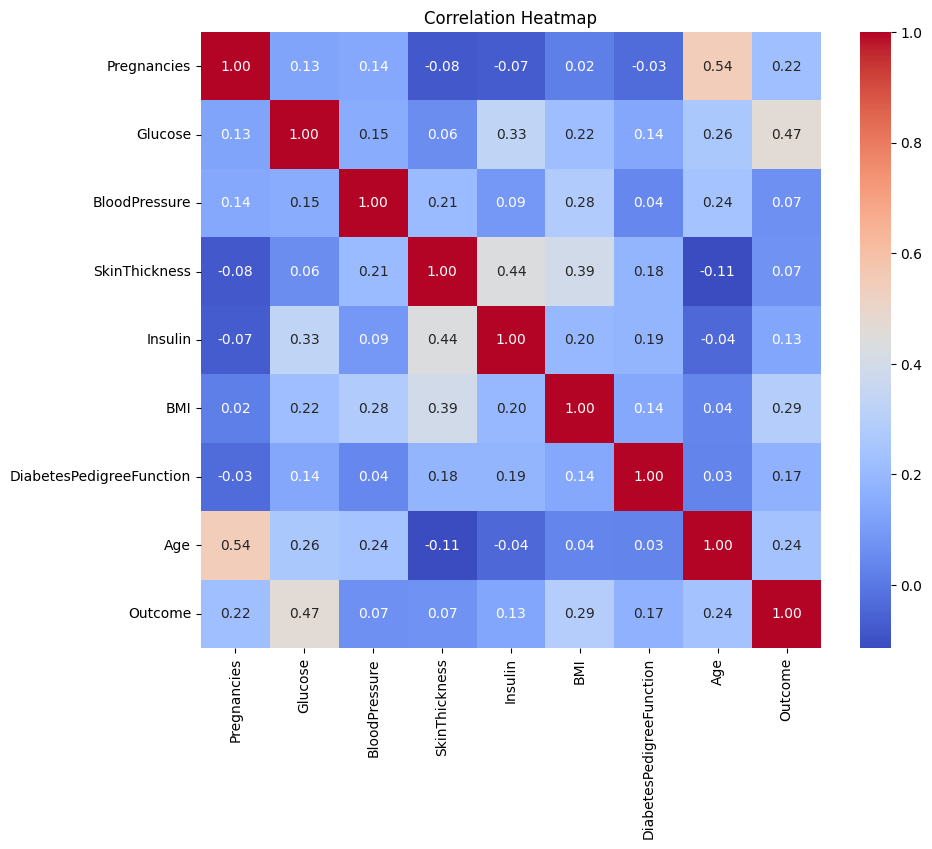

In [11]:
# Correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


## 🔥 Correlation Analysis – Insights

From the heatmap, we can observe the following key points:

### 🔹 Strongest Correlations with Outcome
- **Glucose (0.47):** The most important predictor. Higher glucose levels are strongly associated with diabetes.  
- **BMI (0.29):** Overweight patients tend to have a higher risk of diabetes.  
- **Age (0.24):** Older patients are slightly more prone to diabetes.  
- **Pregnancies (0.22):** More pregnancies correlate with higher diabetes risk.  

### 🔹 Other Observations
- **SkinThickness & Insulin (0.44):** These two features are moderately correlated with each other.  
- **Pregnancies & Age (0.54):** Strong positive correlation → Older women naturally tend to have had more pregnancies.  
- **Most other correlations are weak (<0.3):** Suggesting that features provide complementary information without severe multicollinearity.  

---

📌 **Conclusion:**  
- The dataset is reasonably clean in terms of correlation (no serious multicollinearity).  
- **Glucose, BMI, Age, and Pregnancies** appear as the most influential predictors for diabetes.  
- These insights will guide feature importance analysis and model building.


## 🧹 Data Cleaning – Handling Invalid Zeros

In medical datasets, some features cannot logically have a value of zero.  
For example:
- **Glucose, BloodPressure, SkinThickness, Insulin, BMI** → zero values are invalid.  

We will treat these zeros as **missing values** and replace them with the **median** of the respective feature.  
This approach is preferred over the mean because the data is skewed (especially Insulin), and the median is more robust against outliers.


In [12]:
# Columns where zero is invalid
invalid_cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]


df[invalid_cols] = df[invalid_cols].replace(0, np.nan)


for col in invalid_cols:
    df[col].fillna(df[col].median(), inplace=True)

df[invalid_cols].describe()


,Glucose,BloodPressure,SkinThickness,Insulin,BMI
count,768.000000,768.000000,768.000000,768.000000,768.000000
mean,121.656250,72.386719,29.108073,140.671875,32.455208
std,30.438286,12.096642,8.791221,86.383060,6.875177
min,44.000000,24.000000,7.000000,14.000000,18.200000
25%,99.750000,64.000000,25.000000,121.500000,27.500000
50%,117.000000,72.000000,29.000000,125.000000,32.300000
75%,140.250000,80.000000,32.000000,127.250000,36.600000
max,199.000000,122.000000,99.000000,846.000000,67.100000


## ⚙️ Data Preprocessing – Scaling & Splitting

After cleaning the dataset, we now prepare the data for model building:

1. **Scaling Features**  
   - Standardize all features using `StandardScaler`.  
   - This ensures all variables are on the same scale, which is especially important for models like Logistic Regression and SVM.  

2. **Train-Test Split**  
   - Split the dataset into training (80%) and testing (20%) sets.  
   - Training data will be used to fit the models, while testing data will evaluate performance.


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Train-Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:5]  # preview scaled features


array([[-0.85135507, -1.05642747, -0.82674004, -1.91818693, -1.20336073,
        -0.76947697,  0.31079384, -0.79216928],
       [ 0.35657564,  0.14439907,  0.47777235, -0.22987447, -1.47019479,
        -0.41749769, -0.11643851,  0.56103382],
       [-0.5493724 , -0.55608308, -1.15286813,  1.23332967, -0.55533518,
         0.3597899 , -0.76486207, -0.70759409],
       [-0.85135507,  0.81152492, -1.31593218, -0.00476614, -0.16143729,
        -0.40283188,  0.26231357, -0.36929331],
       [-1.15333775, -0.88964601, -0.66367599,  1.12077551, -0.41556496,
         1.78237284, -0.33762972, -0.96131967]])

## 🤖 Logistic Regression (Baseline Model)

Logistic Regression is a simple yet powerful algorithm for binary classification.  
It models the probability that a patient has diabetes (`Outcome=1`) based on input features.

**Steps:**
1. Train the model on the scaled training data.  
2. Predict on the test set.  
3. Evaluate performance using Accuracy, Precision, Recall, F1-score, and Confusion Matrix.


📊 Logistic Regression Performance
Accuracy : 0.7077922077922078
Precision: 0.6
Recall   : 0.5
F1-score : 0.5454545454545454


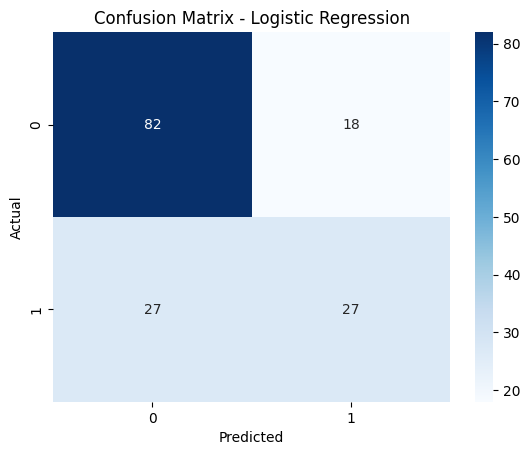

In [14]:
# Logistic Regression
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred_log = log_reg.predict(X_test_scaled)

# Evaluation
print("📊 Logistic Regression Performance")
print("Accuracy :", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall   :", recall_score(y_test, y_pred_log))
print("F1-score :", f1_score(y_test, y_pred_log))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


## 🌳 Decision Tree Classifier

Decision Tree is a non-linear model that splits the data into regions using feature thresholds.  
It is simple, interpretable, and can capture complex relationships.

**Steps:**
1. Train a `DecisionTreeClassifier` on the training set.  
2. Predict outcomes for the test set.  
3. Evaluate using Accuracy, Precision, Recall, F1-score, and Confusion Matrix.  


📊 Decision Tree Performance
Accuracy : 0.6818181818181818
Precision: 0.5531914893617021
Recall   : 0.48148148148148145
F1-score : 0.5148514851485149


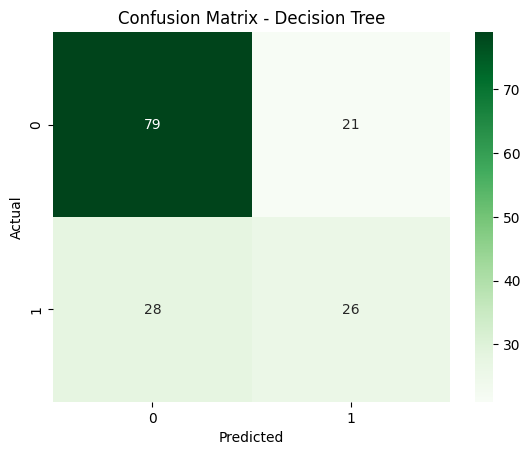

In [16]:
# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)

# Predictions
y_pred_dt = dt.predict(X_test_scaled)

# Evaluation
print("📊 Decision Tree Performance")
print("Accuracy :", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall   :", recall_score(y_test, y_pred_dt))
print("F1-score :", f1_score(y_test, y_pred_dt))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()


## 🌲 Random Forest Classifier

Random Forest is an ensemble method that combines multiple decision trees.  
It reduces overfitting and usually achieves better generalization than a single decision tree.

**Steps:**
1. Train a `RandomForestClassifier` on the training set.  
2. Predict outcomes on the test set.  
3. Evaluate with Accuracy, Precision, Recall, F1-score, and Confusion Matrix.  
4. Compare results with Logistic Regression and Decision Tree.


📊 Random Forest Performance
Accuracy : 0.7792207792207793
Precision: 0.717391304347826
Recall   : 0.6111111111111112
F1-score : 0.66


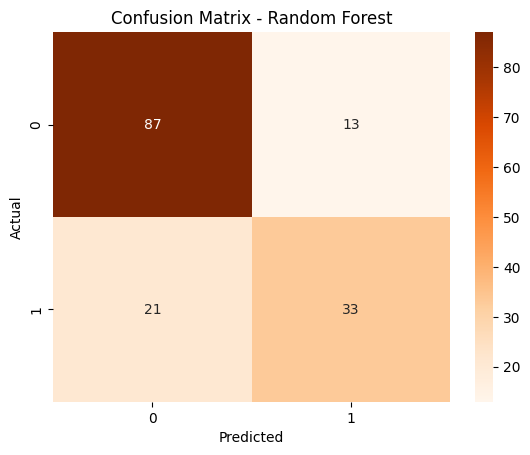

In [19]:
# Random Forest Classifier
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train_scaled, y_train)

# Predictions
y_pred_rf = rf.predict(X_test_scaled)

# Evaluation
print("📊 Random Forest Performance")
print("Accuracy :", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall   :", recall_score(y_test, y_pred_rf))
print("F1-score :", f1_score(y_test, y_pred_rf))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


## ⚡ Support Vector Machine (SVM)

SVM is a powerful algorithm for classification.  
It works by finding the best hyperplane that separates the two classes (diabetes vs non-diabetes).  

**Advantages:**
- Works well with high-dimensional data.  
- Effective when features are scaled (we already standardized our data).  

**Steps:**
1. Train an `SVC` model on the training data.  
2. Predict on the test data.  
3. Evaluate using Accuracy, Precision, Recall, F1-score, and Confusion Matrix.


📊 SVM Performance
Accuracy : 0.7402597402597403
Precision: 0.6521739130434783
Recall   : 0.5555555555555556
F1-score : 0.6


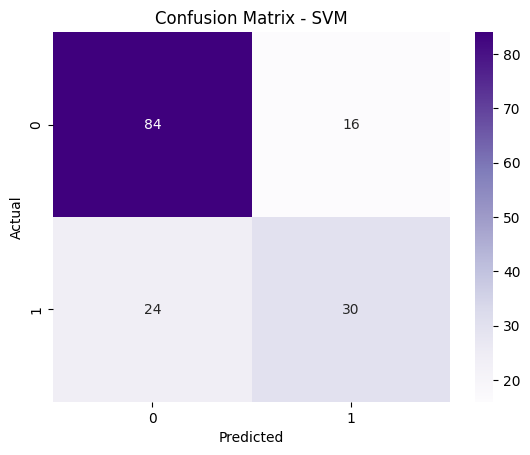

In [21]:
# Support Vector Machine Classifier
svm = SVC(kernel="rbf", random_state=42)  # RBF kernel is common choice
svm.fit(X_train_scaled, y_train)

# Predictions
y_pred_svm = svm.predict(X_test_scaled)

# Evaluation
print("📊 SVM Performance")
print("Accuracy :", accuracy_score(y_test, y_pred_svm))
print("Precision:", precision_score(y_test, y_pred_svm))
print("Recall   :", recall_score(y_test, y_pred_svm))
print("F1-score :", f1_score(y_test, y_pred_svm))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.show()


## ⚡ XGBoost Classifier

XGBoost (Extreme Gradient Boosting) is one of the most powerful ensemble algorithms.  
It builds models sequentially, where each new tree corrects the errors of the previous ones.  

**Advantages:**
- High performance on structured/tabular data.  
- Handles missing values internally.  
- Supports regularization to prevent overfitting.  

**Steps:**
1. Train an `XGBClassifier` on the training set.  
2. Predict outcomes for the test set.  
3. Evaluate using Accuracy, Precision, Recall, F1-score, and Confusion Matrix.  


📊 XGBoost Performance
Accuracy : 0.7597402597402597
Precision: 0.673469387755102
Recall   : 0.6111111111111112
F1-score : 0.6407766990291263


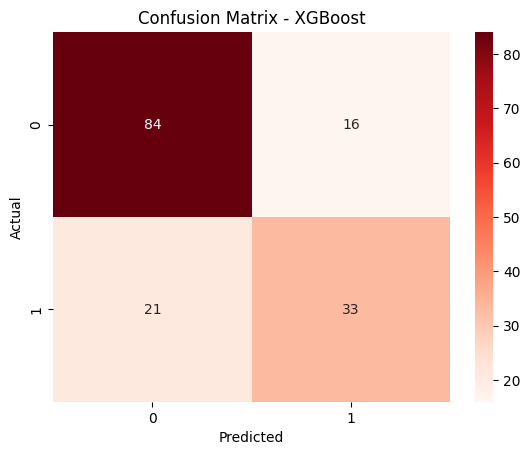

In [23]:
# XGBoost Classifier
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_scaled, y_train)

# Predictions
y_pred_xgb = xgb.predict(X_test_scaled)

# Evaluation
print("📊 XGBoost Performance")
print("Accuracy :", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall   :", recall_score(y_test, y_pred_xgb))
print("F1-score :", f1_score(y_test, y_pred_xgb))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()


## 📊 Model Comparison

Here we summarize the performance of all tested models (Logistic Regression, Decision Tree, Random Forest, SVM, XGBoost).  
Metrics used: Accuracy, Precision, Recall, and F1-score.


In [24]:
# Create a comparison table
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest", "SVM", "XGBoost"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_svm),
        accuracy_score(y_test, y_pred_xgb)
    ],
    "Precision": [
        precision_score(y_test, y_pred_log),
        precision_score(y_test, y_pred_dt),
        precision_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_svm),
        precision_score(y_test, y_pred_xgb)
    ],
    "Recall": [
        recall_score(y_test, y_pred_log),
        recall_score(y_test, y_pred_dt),
        recall_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_svm),
        recall_score(y_test, y_pred_xgb)
    ],
    "F1-score": [
        f1_score(y_test, y_pred_log),
        f1_score(y_test, y_pred_dt),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_svm),
        f1_score(y_test, y_pred_xgb)
    ]
})

# Sort by F1-score (descending)
results = results.sort_values(by="F1-score", ascending=False).reset_index(drop=True)
results


,Model,Accuracy,Precision,Recall,F1-score
0,Random Forest,0.779221,0.717391,0.611111,0.660000
1,XGBoost,0.759740,0.673469,0.611111,0.640777
2,SVM,0.740260,0.652174,0.555556,0.600000
3,Logistic Regression,0.707792,0.600000,0.500000,0.545455
4,Decision Tree,0.681818,0.553191,0.481481,0.514851


## 📊 Model Performance Comparison (Visualization)

To better visualize the performance of all models, we plot a bar chart comparing **Accuracy, Precision, Recall, and F1-score**.  
This helps in quickly identifying which model performs best across different metrics.


<Figure size 1000x600 with 0 Axes>

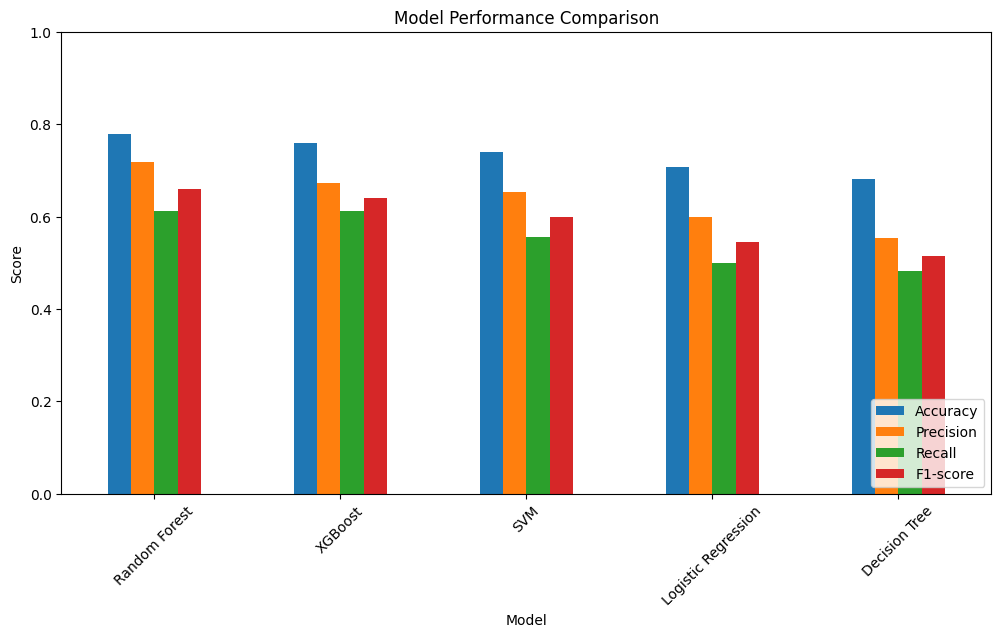

In [25]:
# Bar Plot for Model Performance
results_plot = results.set_index("Model")

plt.figure(figsize=(10,6))
results_plot.plot(kind="bar", figsize=(12,6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)  # metrics are between 0 and 1
plt.xticks(rotation=45)
plt.legend(loc="lower right")
plt.show()


# ✅ Final Conclusion

In this project, we applied different **Machine Learning models** on the **Pima Indians Diabetes Dataset** to predict the likelihood of diabetes based on patient health features.  

### 🔹 Key Steps:
- Data cleaning (handling invalid zeros with median values)  
- Exploratory Data Analysis (EDA) with histograms, boxplots, and correlation heatmap  
- Data preprocessing with scaling and train-test split  
- Model building and evaluation using multiple algorithms:
  - Logistic Regression  
  - Decision Tree  
  - Random Forest  
  - Support Vector Machine (SVM)  
  - XGBoost  

### 🔹 Results:
- **Random Forest** achieved the best overall performance with an **F1-score ≈ 0.66**.  
- **XGBoost** was a close second with **F1-score ≈ 0.64**.  
- Simpler models (Logistic Regression, Decision Tree) had lower recall and F1-score, but still served as useful baselines.  
- **SVM** performed moderately well, better than Logistic Regression but below ensemble methods.  

### 🔹 Insights:
- Glucose, BMI, Age, and Pregnancies are the most important predictors of diabetes.  
- Models generally struggled with **Recall**, indicating difficulty in identifying all diabetic patients.  
- Ensemble methods (Random Forest, XGBoost) provided the most reliable predictions.

---

📌 **Final Note:**  
This notebook demonstrates a complete end-to-end ML pipeline, from raw data → preprocessing → EDA → model training → evaluation → comparison.  
Such a workflow is directly applicable to real-world healthcare datasets and can be extended with hyperparameter tuning, feature engineering, and advanced ensemble techniques.


# 🚀 Future Work

Although the current models achieved reasonable performance, there are several opportunities to further improve and extend this project:

1. **Hyperparameter Tuning**  
   - Use GridSearchCV / RandomizedSearchCV to optimize parameters for Random Forest, SVM, and XGBoost.  
   - Improve model recall and F1-score by fine-tuning class weights and regularization.  

2. **Feature Engineering**  
   - Create interaction features (e.g., BMI × Age).  
   - Apply domain knowledge (e.g., thresholds for glucose or insulin levels).  
   - Perform feature selection to reduce noise and improve interpretability.  

3. **Handling Class Imbalance**  
   - Apply SMOTE or other resampling techniques if the dataset is imbalanced.  
   - Experiment with cost-sensitive learning to penalize misclassification of positive (diabetic) cases.  

4. **Ensemble & Stacking Models**  
   - Combine multiple classifiers (e.g., stacking Random Forest + XGBoost + Logistic Regression).  
   - Explore bagging/boosting hybrids to capture more complex patterns.  

5. **Deep Learning Approach**  
   - Implement a simple **Neural Network (MLP)** for comparison.  
   - Use TensorFlow/PyTorch for advanced experimentation.  

6. **Explainability & Interpretability**  
   - Apply SHAP or LIME to explain predictions.  
   - Provide insights for doctors/patients about why a model predicts "diabetic".  

7. **Deployment**  
   - Build an interactive **web app (Streamlit/Flask)** for real-time diabetes prediction.  
   - Deploy as an API or integrate into healthcare systems for practical use.  

---

📌 **In summary:** Future work focuses on **improving performance, enhancing interpretability, and making the model usable in real-world healthcare applications.**
